# Analysis and Model

In [1]:
# General imports and notebook settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [10, 10]

In [3]:
# Fetch Data
with open('sentiments.json', 'r') as infile:
    data = pd.read_json(infile, orient = 'records')

In [4]:
data.head()

,google_mag1,google_mag2,google_score1,google_score2,id,rating,review_url
0,24.799999,22.0,0.1,0.1,3,★,https://www.nytimes.com/2014/04/02/dining/rest...
1,25.799999,21.5,0.1,0.1,4,★★,https://www.nytimes.com/2013/11/20/dining/revi...
2,31.100000,26.0,0.1,0.1,5,★★★,https://www.nytimes.com/2014/08/27/dining/rest...
3,25.700001,22.4,0.1,0.1,7,★,https://www.nytimes.com/2015/04/08/dining/rest...
4,26.600000,24.0,0.0,-0.1,9,Satisfactory,https://www.nytimes.com/2015/11/11/dining/jams...


## Exploratory Analysis

In [29]:
table = data.groupby('rating').size()
table

rating
Fair              4
Satisfactory      8
★                70
★★              126
★★★              32
★★★★              3
dtype: int64

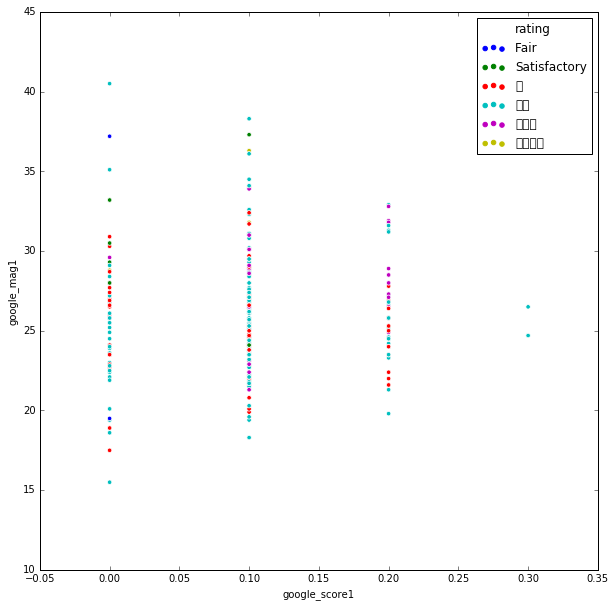

In [6]:
sns.scatterplot(x="google_score1", y="google_mag1", data=data,
                hue="rating", hue_order = ["Fair", "Satisfactory","★", "★★", "★★★", "★★★★"] )

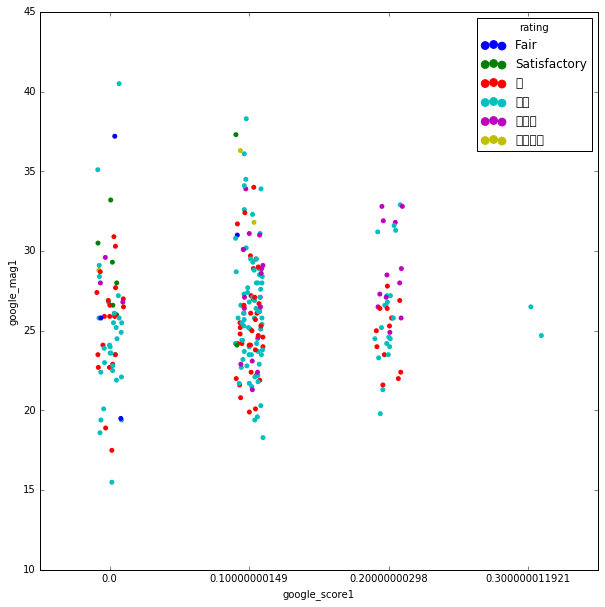

In [7]:
sns.stripplot(x="google_score1", y="google_mag1", data=data,
                hue="rating", hue_order = ["Fair", "Satisfactory","★", "★★", "★★★", "★★★★"])

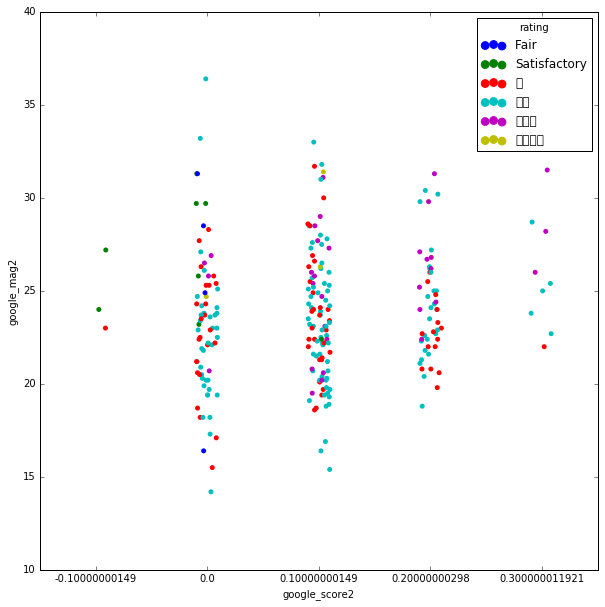

In [8]:
sns.stripplot(x="google_score2", y="google_mag2", data=data,
                hue="rating", hue_order = ["Fair", "Satisfactory","★", "★★", "★★★", "★★★★"])

There's not really any obvious correlation. 

### Building a model

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [10]:
X = data[['google_mag1', 'google_score1']]
Y = data['rating']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [40]:
model_A = LogisticRegression().fit(X_train,Y_train)
training_accuracy = accuracy_score(Y_train, model_A.predict(X_train))
testing_accuracy = accuracy_score(Y_test, model_A.predict(X_test))
print("Training Accuracy: %f" % training_accuracy)
print("Testing Accuracy: %f" % testing_accuracy)

Training Accuracy: 0.510989
Testing Accuracy: 0.540984


In [39]:
model_B = LogisticRegression(multi_class = 'multinomial', solver='newton-cg').fit(X_train,Y_train)
training_accuracy = accuracy_score(Y_train, model_B.predict(X_train))
testing_accuracy = accuracy_score(Y_test, model_B.predict(X_test))
print("Training Accuracy: %f" % training_accuracy)
print("Testing Accuracy: %f" % testing_accuracy)

Training Accuracy: 0.494505
Testing Accuracy: 0.475410


In [34]:
model_A.coef_

array([[ -1.31442525e-01,  -2.13810433e-01],
       [ -8.36420186e-02,  -5.28473392e-01],
       [ -6.76527512e-02,  -8.10621884e-02],
       [ -3.01718197e-02,   3.09710819e-02],
       [  3.68087950e-06,   8.43265590e-01],
       [ -1.14317329e-01,  -1.48598647e-01]])

In [27]:
model_A.predict_proba(X_test)[0]

array([ 0.02325954,  0.04246846,  0.29181965,  0.48261912,  0.13494871,
        0.02488451])

In [32]:
table/sum(table)

rating
Fair            0.016461
Satisfactory    0.032922
★               0.288066
★★              0.518519
★★★             0.131687
★★★★            0.012346
dtype: float64

The model's predictions basically just match the observed probabilities in the data set. We're not learning anything here.  This model seems to support our hypothesis.

Idea - check this with simulation? What if we randomly shuffle the models?

In [38]:
naive_accuracy = accuracy_score(Y_test, ["★★"]*len(Y_test))
naive_accuracy

0.54098360655737709